# Disease Detection On X-ray Images  
## _NO CV 93.75%_CV 94.075%
https://www.kaggle.com/mayank1101sharma/disease-detection-on-x-ray-images

In [1]:
# Import all the necessary libraries
import glob
import cv2
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import sparse_categorical_crossentropy

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix


In [2]:
train_idg = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 30,  
    zoom_range = 0.2, 
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip = True,
)
test_idg = ImageDataGenerator(
    rescale = 1./255.
)
val_idg = ImageDataGenerator(
    rescale=1./255.
)

In [3]:
IMG_SIZE = (224, 224)

train = train_idg.flow_from_directory('./input/chest_xray/train', 
                                      class_mode='binary',
                                      color_mode="grayscale",
                                      target_size = IMG_SIZE
                                     )
test = test_idg.flow_from_directory('./input/chest_xray/test', 
                                    class_mode='binary',
                                    color_mode="grayscale",
                                    target_size = IMG_SIZE
                                   )
val = val_idg.flow_from_directory('./input/chest_xray/val',
                                  class_mode='binary',
                                  color_mode="grayscale",
                                  target_size = IMG_SIZE
                                 )

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
trainX, trainY = train.next()
testX, testY = test.next()
valX, valY = val.next()

print(len(trainX), len(trainY))#32 32

32 32


In [5]:
print('Train X=%s Y=%s' %(trainX.shape, trainY.shape))
print('Test X=%s Y=%s' %(testX.shape, testY.shape))
print('Val X=%s Y=%s' %(valX.shape, valY.shape))

Train X=(32, 224, 224, 1) Y=(32,)
Test X=(32, 224, 224, 1) Y=(32,)
Val X=(16, 224, 224, 1) Y=(16,)


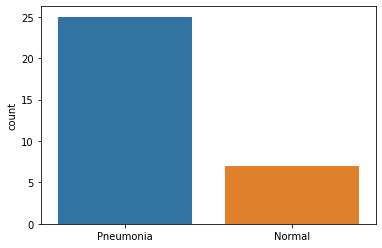

In [6]:
labels = ['Normal' if label == 0 else 'Pneumonia' for label in trainY]
sns.countplot(labels)

In [7]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (224, 224,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
#model.summary()

In [16]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [17]:
history = model.fit(train ,batch_size=32, epochs = 15 , validation_data = val ,callbacks = [learning_rate_reduction])

Epoch 1/15
163/163 [==============================] - 443s 3s/step - loss: 0.5927 - accuracy: 0.8405 - val_loss: 18.7135 - val_accuracy: 0.5000
Epoch 2/15
163/163 [==============================] - 440s 3s/step - loss: 0.2902 - accuracy: 0.8984 - val_loss: 23.6093 - val_accuracy: 0.5000
Epoch 3/15
163/163 [==============================] - ETA: 0s - loss: 0.2643 - accuracy: 0.9101
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 437s 3s/step - loss: 0.2643 - accuracy: 0.9101 - val_loss: 12.6644 - val_accuracy: 0.5000
Epoch 4/15
163/163 [==============================] - 435s 3s/step - loss: 0.1712 - accuracy: 0.9471 - val_loss: 0.6836 - val_accuracy: 0.5625
Epoch 5/15
163/163 [==============================] - 434s 3s/step - loss: 0.1416 - accuracy: 0.9517 - val_loss: 29.4749 - val_accuracy: 0.5000
Epoch 6/15
163/163 [==============================] - ETA: 0s - loss: 0.1257 - accuracy: 0.9574
Epoch 00006: ReduceL

In [18]:
print("Loss of the model is - " , model.evaluate(testX,testY)[0])
print("Accuracy of the model is - " , model.evaluate(testX,testY)[1]*100 , "%")

1/1 [==============================] - 0s 1ms/step - loss: 0.2447 - accuracy: 0.9375
Loss of the model is -  0.2447020560503006
1/1 [==============================] - 0s 1ms/step - loss: 0.2447 - accuracy: 0.9375
Accuracy of the model is -  93.75 %


# FOR CV_CNN(Disease)

In [8]:
path = './input/chest_xray/'
# define paths
train_normal_dir = path + 'train/NORMAL/'
train_pneu_dir = path + 'train/PNEUMONIA/'

test_normal_dir = path + 'test/NORMAL/'
test_pneu_dir = path + 'test/PNEUMONIA/'

val_normal_dir = path + 'val/NORMAL/'
val_pneu_dir = path + 'val/PNEUMONIA/'

# find all files, our files has extension jpeg
train_normal_cases = glob.glob(train_normal_dir + '*jpeg') #1341
train_pneu_cases = glob.glob(train_pneu_dir + '*jpeg')#3875

test_normal_cases = glob.glob(test_normal_dir + '*jpeg')#234
test_pneu_cases = glob.glob(test_pneu_dir + '*jpeg')#390

val_normal_cases = glob.glob(val_normal_dir + '*jpeg')#8
val_pneu_cases = glob.glob(val_pneu_dir + '*jpeg')#8


# make path using / instead of \\ ... this may be redudant step
train_normal_cases = [x.replace('\\', '/') for x in train_normal_cases]
train_pneu_cases = [x.replace('\\', '/') for x in train_pneu_cases]
test_normal_cases = [x.replace('\\', '/') for x in test_normal_cases]
test_pneu_cases = [x.replace('\\', '/') for x in test_pneu_cases]
val_normal_cases = [x.replace('\\', '/') for x in val_normal_cases]
val_pneu_cases = [x.replace('\\', '/') for x in val_pneu_cases]

In [9]:
# create lists for train, test & validation cases, create labels as well
train_list = []
test_list = []
val_list = []

for x in train_normal_cases:
    train_list.append([x, 0])

for x in train_pneu_cases:
    train_list.append([x, 1])

for x in test_normal_cases:
    test_list.append([x, 0])

for x in test_pneu_cases:
    test_list.append([x, 1])

for x in val_normal_cases:
    val_list.append([x, 0])

for x in val_pneu_cases:
    val_list.append([x, 1])

In [10]:
# shuffle/randomize data as they were loaded in order: normal cases, then pneumonia cases
random.shuffle(train_list)
random.shuffle(test_list)
random.shuffle(val_list)

In [11]:
# create dataframes
train_df = pd.DataFrame(train_list, columns=['image', 'label'])
test_df = pd.DataFrame(test_list, columns=['image', 'label'])
val_df = pd.DataFrame(val_list, columns=['image', 'label'])

In [12]:
def process_data(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img/255.0
    img = np.reshape(img, (224, 224,1))
   
    return img

def compose_dataset(df):
    data = []
    labels = []

    for img_path, label in df.values:
        data.append(process_data(img_path))
        labels.append(label)
       
    return np.array(data), np.array(labels)

In [13]:
X_train, y_train = compose_dataset(train_df)
X_test, y_test = compose_dataset(test_df)
X_val, y_val = compose_dataset(val_df)

print('Train data shape: {}, Labels shape: {}'.format(X_train.shape, y_train.shape))
print('Test data shape: {}, Labels shape: {}'.format(X_test.shape, y_test.shape))
print('Validation data shape: {}, Labels shape: {}'.format(X_val.shape, y_val.shape))

Train data shape: (5216, 224, 224, 1), Labels shape: (5216,)
Test data shape: (624, 224, 224, 1), Labels shape: (624,)
Validation data shape: (16, 224, 224, 1), Labels shape: (16,)


In [14]:
# define generator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

# fit generator on our train features
datagen.fit(X_train)

In [15]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [16]:
kfold = KFold(n_splits=5, shuffle=True)

# Model configuration
img_width, img_height, img_num_channels = 224, 224, 1 #gray image channel = 1
loss_function = sparse_categorical_crossentropy
acc_per_fold = []
loss_per_fold = []

In [44]:
def get_model():
    model = Sequential([
        Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (224, 224,1)),
        BatchNormalization(),
        MaxPool2D((2,2) , strides = 2 , padding = 'same'),
        
        Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
        Dropout(0.1),
        BatchNormalization(),
        
        MaxPool2D((2,2) , strides = 2 , padding = 'same'),
        Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
        BatchNormalization(),
        
        MaxPool2D((2,2) , strides = 2 , padding = 'same'),
        Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
        Dropout(0.2),
        BatchNormalization(),
        
        MaxPool2D((2,2) , strides = 2 , padding = 'same'),
        Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
        Dropout(0.2),
        BatchNormalization(),
        
        MaxPool2D((2,2) , strides = 2 , padding = 'same'),
        Flatten(),
        Dense(units = 128 , activation = 'relu'),
        Dropout(0.2),
        Dense(units = 2 , activation = 'sigmoid')##2 or 1 + sigmoid or softmax       
    ])
    # compile model
    model.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=['accuracy'])
    ## 최적화 adam or rmsprop..
    
    return model


In [45]:
for i, (train, test) in enumerate(kfold.split(X_train, y_train), 1):
   
    print(f'training model for Kfold #{i}')
    callback = EarlyStopping(monitor='loss', patience=6)
   
    model = get_model()

    # Fit data to model
    #model.fit(datagen.flow(X_train[train], y_train[train], batch_size=4),
    history = model.fit(X_train[train], y_train[train],
                        batch_size = 16,
                        epochs=20,
                        callbacks=[callback],
                        verbose = 1,
                        class_weight={0:6.0, 1:0.5}
                       )
   
    scores = model.evaluate(X_train[test], y_train[test], verbose=0)
    print(f'Score for fold {i}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
   
    filename = './models/model_Diseasecnn' + str(i) + '.h5'
    model.save(filename)
    print('>Saved %s' % filename)

training model for Kfold #1
Epoch 1/20
261/261 [==============================] - 372s 1s/step - loss: 2.6023 - accuracy: 0.8094
Epoch 2/20
261/261 [==============================] - 357s 1s/step - loss: 0.8881 - accuracy: 0.9186
Epoch 3/20
261/261 [==============================] - 354s 1s/step - loss: 0.5813 - accuracy: 0.9259
Epoch 4/20
261/261 [==============================] - 350s 1s/step - loss: 0.7657 - accuracy: 0.9275
Epoch 5/20
261/261 [==============================] - 347s 1s/step - loss: 0.4332 - accuracy: 0.9552
Epoch 6/20
261/261 [==============================] - 334s 1s/step - loss: 0.4555 - accuracy: 0.9513
Epoch 7/20
261/261 [==============================] - 330s 1s/step - loss: 0.5287 - accuracy: 0.9611
Epoch 8/20
261/261 [==============================] - 330s 1s/step - loss: 0.5682 - accuracy: 0.9615
Epoch 9/20
261/261 [==============================] - 331s 1s/step - loss: 0.7443 - accuracy: 0.9569
Epoch 10/20
261/261 [==============================] - 330s 1s/

In [46]:
# == Provide average scores ==
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
    print('------------------------------------------------------------------------')
    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
    print(f'> Loss: {np.mean(loss_per_fold)}')
    print('------------------------------------------------------------------------')

Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.6271179914474487 - Accuracy: 95.4023003578186%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 94.07566666603088 (+- 3.1810663735894322)
> Loss: 1.0337409913539886
------------------------------------------------------------------------
------------------------------------------------------------------------
> Fold 2 - Loss: 1.0051307678222656 - Accuracy: 94.8226273059845%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 94.07566666603088 (+- 3.1810663735894322)
> Loss: 1.0337409913539886
------------------------------------------------------------------------
------------------------------------------------------------------------
> Fold 3 - Loss: 1.502806544303894 - Accuracy: 94.15148496627808%
------------------------------------------------------

In [47]:
acc_per_fold

[95.4023003578186,
 94.8226273059845,
 94.15148496627808,
 97.7948248386383,
 88.20709586143494]

In [51]:
def average(list):

    return (sum(list) / len(list))

print("Test acc : {}".format(average(acc_per_fold)));

Test acc : 94.07566666603088
